In [1]:
import pandas as pd
case_df = pd.read_csv(filepath_or_buffer='/kaggle/input/copyrights-fair-use-index/fair_use_cases.csv')
case_df.head()

,case,year,court,jurisdiction,categories,outcome,fair_use_found
0,"De Fontbrune v. Wofsy, 39 F.4th 1214 (9th Cir....",2022,9th Circuit,9th Circuit,Education/Scholarship/Research; Photograph,Fair use not found,False
1,"Sedlik v. Von Drachenberg, No. CV 21-1102 (C.D...",2022,C.D. Cal.,9th Circuit,Painting/Drawing/Graphic; Photograph,Preliminary finding; Fair use not found,False
2,"Sketchworks Indus. Strength Comedy, Inc. v. Ja...",2022,S.D.N.Y.,2nd Circuit,Film/Audiovisual; Music; Parody/Satire; Review...,Fair use found,True
3,Am. Soc'y for Testing & Materials v. Public.Re...,2022,D.D.C.,District of Columbia Circuit,Education/Scholarship/Research; Textual Work; ...,Mixed Result,False
4,"Yang v. Mic Network Inc., Nos. 20-4097-cv, 20-...",2022,2d Circuit,2nd Circuit,News reporting; Photography,Fair use found,True


In [2]:
case_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   case            251 non-null    object
 1   year            251 non-null    int64 
 2   court           251 non-null    object
 3   jurisdiction    251 non-null    object
 4   categories      251 non-null    object
 5   outcome         251 non-null    object
 6   fair_use_found  251 non-null    bool  
dtypes: bool(1), int64(1), object(5)
memory usage: 12.1+ KB


In [3]:
case_df['fair_use_found'].value_counts()

fair_use_found
False    150
True     101
Name: count, dtype: int64

In [4]:
from plotly.express import histogram
histogram(data_frame=case_df.sort_values(ascending=False, by='fair_use_found'), x='year', color='fair_use_found')

In [5]:
from plotly.express import bar
for column in ['court', 'jurisdiction', 'outcome']:
    columns = [column, 'fair_use_found']
    bar(data_frame=case_df[columns].sort_values(ascending=False, by='fair_use_found').groupby(by=columns).size().reset_index().sort_values(ascending=False, by=0), x=column, y=0, color='fair_use_found').show()

(-0.5, 1199.5, 1199.5, -0.5)

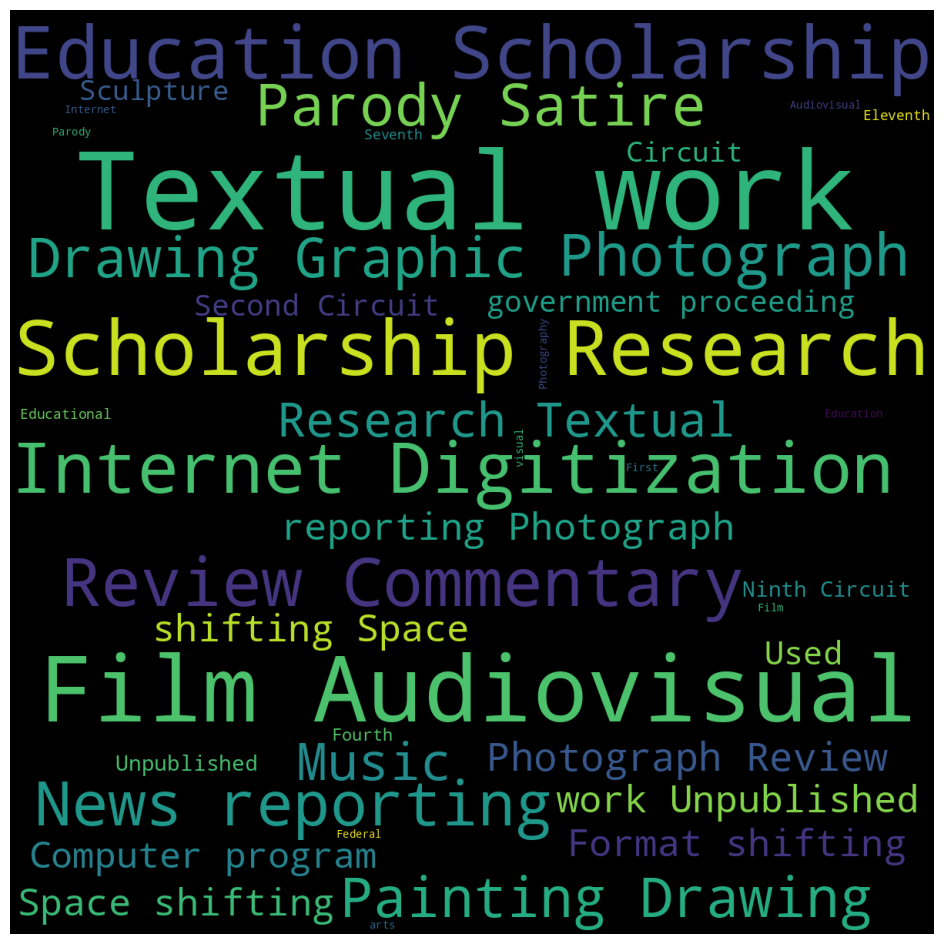

In [6]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud

subplots(figsize=(12, 12))
text = ' '.join(case_df['categories'].values)
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, ).generate(text=text), )
axis('off')

In [7]:
finding_df = pd.read_csv(filepath_or_buffer='/kaggle/input/copyrights-fair-use-index/fair_use_findings.csv')
finding_df.head()

,title,case_number,year,court,key_facts,issue,holding,tags,outcome
0,De Fontbrune v. Wofsy,39 F.4th 1214 (9th Cir. 2022),2022,United States Court of Appeals for the Ninth C...,Plaintiffs own the rights to a catalogue compr...,Whether reproduction of photographs documentin...,"The panel held that the first factor, the purp...",Education/Scholarship/Research; Photograph,Fair use not found
1,Sedlik v. Von Drachenberg,"No. CV 21-1102, 2022 WL 2784818 (C.D. Cal. May...",2022,United States District Court for the Southern ...,Plaintiff Jeffrey Sedlik is a photographer who...,Whether use of a photograph as the reference i...,"Considering the first fair use factor, the pur...",Painting/Drawing/Graphic; Photograph,Preliminary finding; Fair use not found
2,"Sketchworks Indus. Strength Comedy, Inc. v. Ja...","No. 19-CV-7470-LTS-VF, 2022 U.S. Dist. LEXIS 8...",2022,United States District Court for the Southern ...,Plaintiff Sketchworks Industrial Strength Come...,"Whether the use of protected elements, includi...","The court found that the first factor, the pur...",Film/Audiovisual; Music; Parody/Satire; Review...,Fair use found
3,Am. Soc'y for Testing & Materials v. Public.Re...,"No. 13-cv-1215 (TSC), 2022 U.S. Dist. LEXIS 60...",2022,United States District Court for the District ...,"Defendant Public.Resource.Org, Inc., a non-pro...",Whether it is fair use to make available onlin...,"As directed by the court of appeals, the distr...",Education/Scholarship/Research; Textual Work; ...,Mixed Result
4,Yang v. Mic Network Inc.,"Nos. 20-4097-cv(L), 20-4201-cv (XAP), 2022 U.S...",2022,United States Court of Appeals for the Second ...,Plaintiff Stephen Yang (“Yang”) licensed a pho...,"Whether using a screenshot from an article, in...","On appeal, the court decided that the first fa...",News Reporting; Photography,Fair use found


In [8]:
finding_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        251 non-null    object
 1   case_number  251 non-null    object
 2   year         251 non-null    object
 3   court        251 non-null    object
 4   key_facts    251 non-null    object
 5   issue        251 non-null    object
 6   holding      251 non-null    object
 7   tags         251 non-null    object
 8   outcome      251 non-null    object
dtypes: object(9)
memory usage: 17.8+ KB


In [9]:
histogram_df = finding_df[finding_df['year'] != '2017, affirmed 2018'].copy()
histogram_df['year'] = histogram_df['year'].astype(int)
histogram(data_frame=histogram_df, x='year',)

In [10]:
TOP_N=10
for column in ['court', 'outcome']:
    bar(data_frame=finding_df[column].value_counts().to_frame().reset_index().head(n=TOP_N), x=column, y='count',
       title='Top {} {}s by count'.format(TOP_N, column)).show()

(-0.5, 1199.5, 1199.5, -0.5)

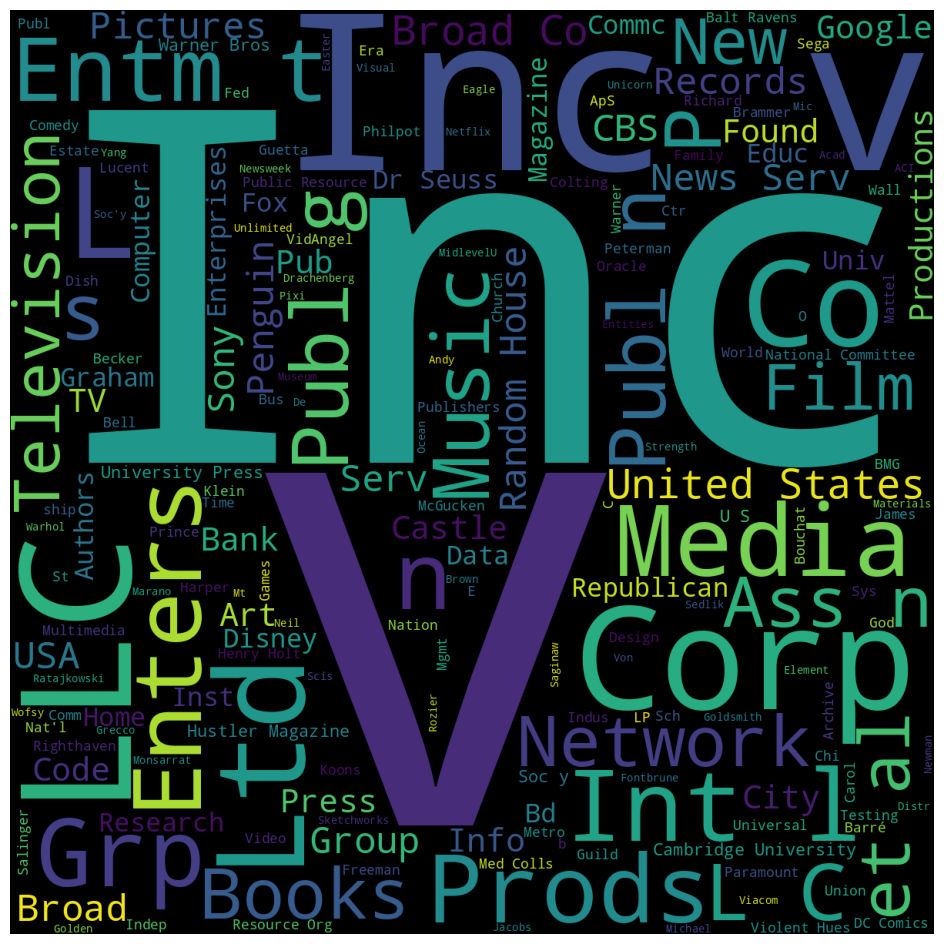

In [11]:
subplots(figsize=(12, 12))
text = ' '.join(finding_df['title'].values)
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, ).generate(text=text), )
axis('off')

So many companies.

(-0.5, 1199.5, 1199.5, -0.5)

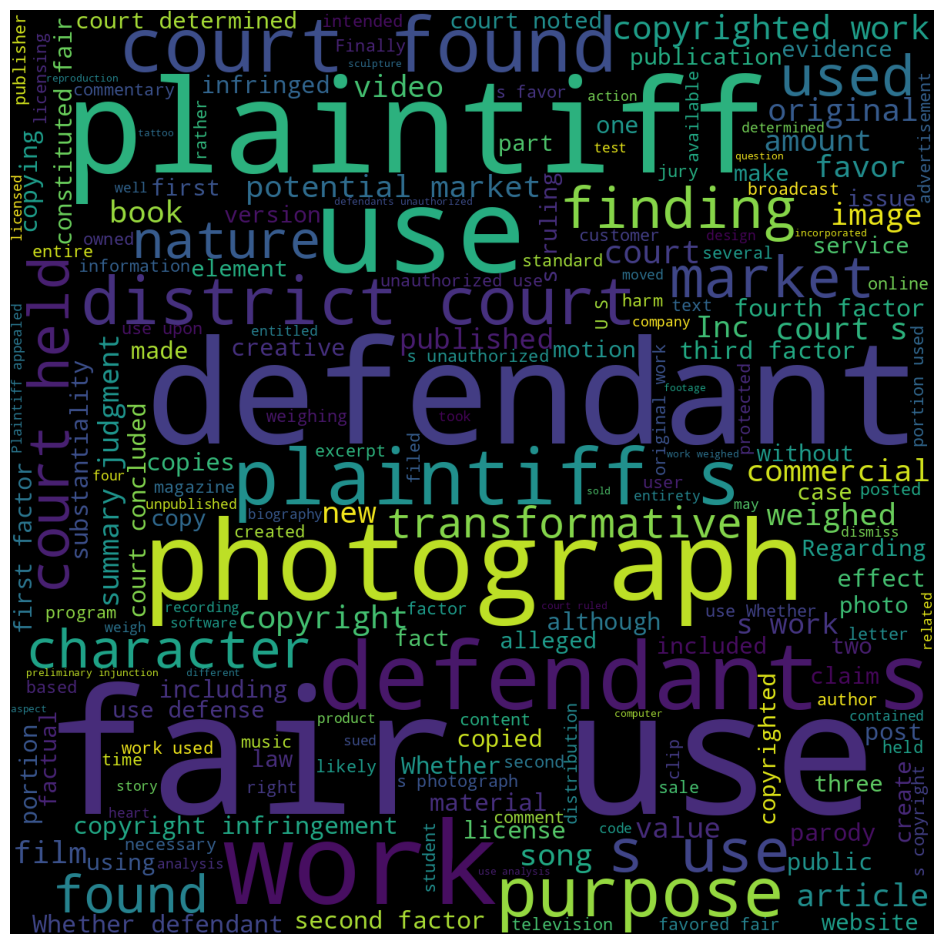

In [12]:
subplots(figsize=(12, 12))
text = ' '.join(finding_df['key_facts'].values + finding_df['issue'].values + finding_df['holding'].values)
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, ).generate(text=text), )
axis('off')

(-0.5, 1199.5, 1199.5, -0.5)

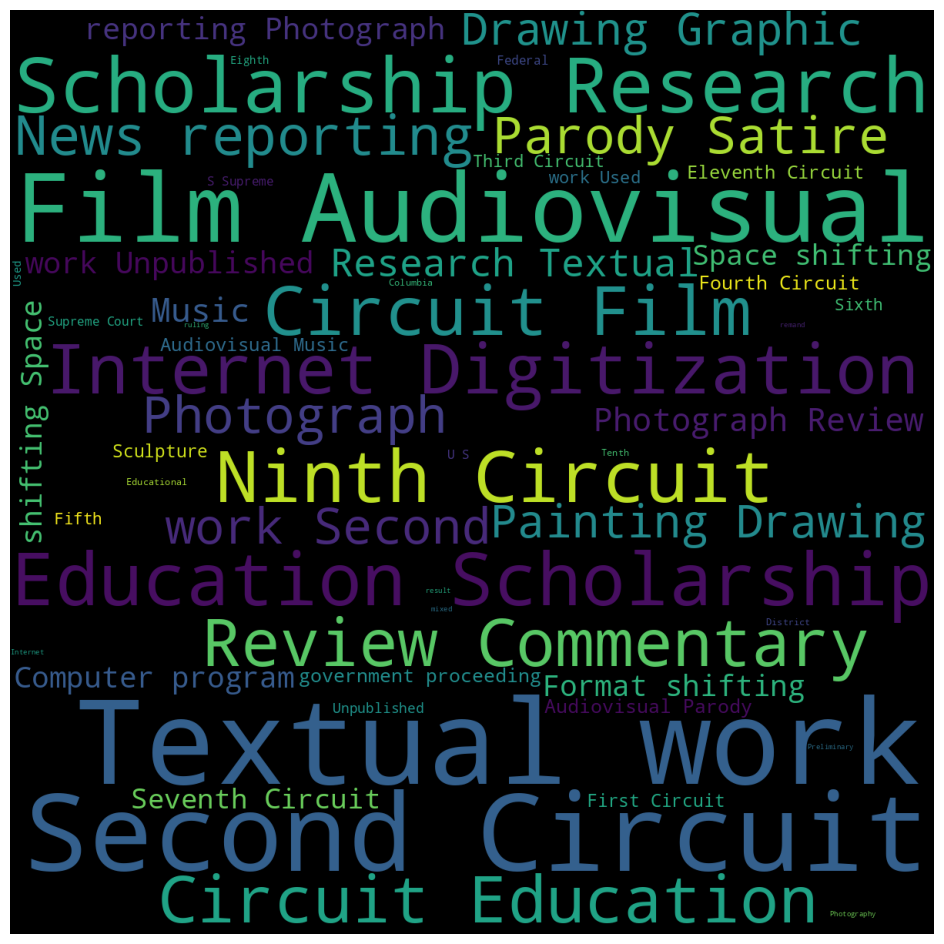

In [13]:
subplots(figsize=(12, 12))
text = ' '.join(finding_df['tags'].values)
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, ).generate(text=text), )
axis('off')